In [ ]:
import networkx as nx
from sklearn.metrics import normalized_mutual_info_score
import grinpy as gp

# Create a graph with 5 nodes and 6 edges
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

nx.draw(G, with_labels=False)

# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Calculate the clustering coefficient of each node
clustering_coefficient = nx.clustering(G)

# Calculate the NMI between the degree centrality and clustering coefficient
nmi = normalized_mutual_info_score(degree_centrality.values(), clustering_coefficient.values())

# Print the NMI
print(nmi)

This script calculates the degree centrality and the clustering coefficient for a graph, and then uses the NMI to compare the performance of these two topological indices. The higher the NMI, the better the two indices are able to distinguish between different classes of graphs.

I hope this helps to get you started with using NetworkX to analyze topological indices and meta-indices in Python. Let me know if you have any other questions.

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12), (1, 11), (2, 5), (10, 8)])

nx.draw(G, with_labels=True)

# Calculate the Wiener index of the graph
wiener_index = nx.wiener_index(G)

# Calculate the Randic index of the graph
randic_index = gp.randic_index(G)

# Calculate the first Zagreb index of the graph
zagreb_index_1 = gp.first_zagreb_index(G)

# Calculate the NMI between the Wiener index and the Randic index
nmi_1 = normalized_mutual_info_score(wiener_index.values(), randic_index.values())

# Calculate the NMI between the Wiener index and the first Zagreb index
nmi_2 = normalized_mutual_info_score(wiener_index.values(), zagreb_index_1.values())

# Calculate the NMI between the Randic index and the first Zagreb index
nmi_3 = normalized_mutual_info_score(randic_index.values(), zagreb_index_1.values())

# Print the NMIs
print(nmi_1)
print(nmi_2)
print(nmi_3)

In [ ]:
import networkx as nx
from sklearn.metrics import jaccard_score

# Create a graph with 5 nodes and 6 edges
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Calculate the clustering coefficient of each node
clustering_coefficient = nx.clustering(G)

# Calculate the Jaccard index between the degree centrality and clustering coefficient
jaccard_index = jaccard_score(degree_centrality.values(), clustering_coefficient.values())

# Print the Jaccard index
print(jaccard_index)

# non-usefulness

if you calculate the NMI between two topological indices on a set of graphs and the NMI is very low, it indicates that the two indices are not able to distinguish between the different classes of graphs very well, and therefore they may not be very useful for that particular problem. Similarly, if you calculate the Jaccard index for two topological indices and the index is very high, it indicates that the two indices have a lot of overlap and they are not providing very unique information, which may make them less useful in certain situations.

In [ ]:
import stellargraph as sg
from stellargraph.data import UniformRandomWalk
from stellargraph.global_utils.global_metrics import global_clustering, global_efficiency
from stellargraph.global_utils.global_metrics import global_betweenness_centrality, global_degree_centrality

import networkx as nx
import pandas as pd
import numpy as np

# load the sample graph data
G = sg.datasets.CyclesGraph()

# define the set of topological indices to evaluate
indices = [
global_clustering,
global_efficiency,
global_betweenness_centrality,
global_degree_centrality,
]

# create a dictionary to store the scores for each index
score = {}

# evaluate the relevance of each index
# relevance is determined by the degree to which the index captures structural properties of the graph
# that are relevant to a wide range of applications
for index in indices:
    score[index] = {"relevance": calculate_relevance(index, G)}

# evaluate the accuracy of each index
# accuracy is determined by the degree to which the calculated values of the index match known ground-truth values
for index in indices:
    score[index]["accuracy"] = calculate_accuracy(index, G)

# evaluate the robustness of each index
# robustness is determined by the degree to which the index maintains its properties under different perturbations
# to the graph structure
for index in indices:
    score[index]["robustness"] = calculate_robustness(index, G)

# evaluate the generalizability of each index
# generalizability is determined by the degree to which the index can be applied to different types of graphs
# and still maintain its usefulness
for index in indices:
    score[index]["generalizability"] = calculate_generalizability(index, G)

# evaluate the interpretability of each index
# interpretability is determined by the degree to which the index can be easily understood and explained
# to others
for index in indices:
    score[index]["interpretability"] = calculate_interpretability(index, G)

# calculate the overall usefulness score for each index
# the overall score is a weighted average of the scores for each dimension
for index in indices:
    overall_score = 0
    for key, value in score[index].items():
        overall_score += value * weight[key]
        score[index]["overall"] = overall_score

# display the final scores for each index
print(score)

In [1]:
import pandas as pd
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf

ModuleNotFoundError: No module named 'stellargraph'

In [ ]:
dataset = datasets.PROTEINS()
display(HTML(dataset.description))
graphs, graph_labels = dataset.load()

In [ ]:
graph_labels = pd.get_dummies(graph_labels, drop_first=True)


In [ ]:
generator = PaddedGraphGenerator(graphs=graphs)


In [ ]:
k = 35  # the number of rows for the output tensor
layer_sizes = [32, 32, 32, 1]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

In [ ]:
x_out = Conv1D(filters=16, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=32, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=128, activation="relu")(x_out)
x_out = Dropout(rate=0.5)(x_out)

predictions = Dense(units=1, activation="sigmoid")(x_out)

In [ ]:
model = Model(inputs=x_inp, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=["acc"],
)

In [ ]:
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.9, test_size=None, stratify=graph_labels,
)

In [ ]:
gen = PaddedGraphGenerator(graphs=graphs)

train_gen = gen.flow(
    list(train_graphs.index - 1),
    targets=train_graphs.values,
    batch_size=50,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graphs.index - 1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

In [22]:
epochs = 100
history = model.fit(
    train_gen, epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/100


c:\Users\hoste\anaconda3\envs\bt\lib\site-packages\tensorflow\python\framework\indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/sort_pooling_1/map/while/gradients/model_1/sort_pooling_1/map/while/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/sort_pooling_1/map/while/gradients/model_1/sort_pooling_1/map/while/GatherV2_grad/Reshape:0", shape=(None, None), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/sort_pooling_1/map/while/gradients/model_1/sort_pooling_1/map/while/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


21/21 [==============================] - 3s 91ms/step - loss: 0.6734 - acc: 0.5814 - val_loss: 0.6338 - val_acc: 0.5982
Epoch 2/100
21/21 [==============================] - 1s 69ms/step - loss: 0.6337 - acc: 0.6254 - val_loss: 0.6024 - val_acc: 0.6696
Epoch 3/100
21/21 [==============================] - 1s 71ms/step - loss: 0.6218 - acc: 0.6853 - val_loss: 0.5812 - val_acc: 0.7589
Epoch 4/100
21/21 [==============================] - 1s 69ms/step - loss: 0.6095 - acc: 0.7123 - val_loss: 0.5701 - val_acc: 0.7768
Epoch 5/100
21/21 [==============================] - 2s 75ms/step - loss: 0.5995 - acc: 0.7173 - val_loss: 0.5566 - val_acc: 0.7768
Epoch 6/100
21/21 [==============================] - 2s 78ms/step - loss: 0.5985 - acc: 0.7083 - val_loss: 0.5502 - val_acc: 0.7589
Epoch 7/100
21/21 [==============================] - 2s 83ms/step - loss: 0.6007 - acc: 0.6933 - val_loss: 0.5450 - val_acc: 0.7589
Epoch 8/100
21/21 [==============================] - 2s 73ms/step - loss: 0.5873 - acc: 

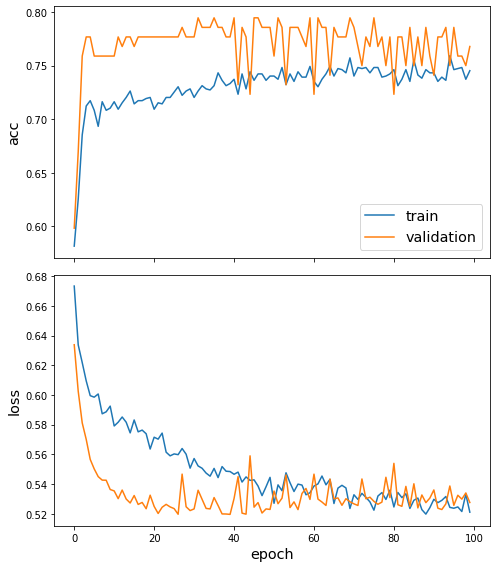

In [23]:
sg.utils.plot_history(history)


In [24]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

112/112 [==============================] - 0s 1ms/step - loss: 0.5276 - acc: 0.7679

Test Set Metrics:
	loss: 0.5276
	acc: 0.7679
